# 日経平均株価 日足

In [17]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import yfinance as yf

code = 'N225'
symbol = '^%s' % code
ticker = yf.Ticker(symbol)

#df = ticker.history(period='1y', start='2024-01-01', end='2024-12-31') # All data in 2024
df = ticker.history(period='1y')  # All data in 2024
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-14 00:00:00+09:00,38591.730469,38840.328125,38400.171875,38807.378906,111100000,0.0,0.0
2024-03-15 00:00:00+09:00,38548.160156,38808.679688,38519.941406,38707.640625,167100000,0.0,0.0
2024-03-18 00:00:00+09:00,38960.988281,39769.109375,38935.468750,39740.441406,128700000,0.0,0.0
2024-03-19 00:00:00+09:00,39622.578125,40003.601562,39407.500000,40003.601562,134700000,0.0,0.0
2024-03-21 00:00:00+09:00,40511.550781,40823.320312,40452.191406,40815.660156,157200000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-10 00:00:00+09:00,36972.589844,37113.480469,36705.019531,37028.269531,109800000,0.0,0.0
2025-03-11 00:00:00+09:00,36584.371094,36793.109375,35987.128906,36793.109375,153600000,0.0,0.0
2025-03-12 00:00:00+09:00,36763.101562,36956.328125,36658.859375,36819.089844,128700000,0.0,0.0


In [18]:
df0 = ticker.history(period='max')
df0

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1965-01-05 00:00:00+09:00,1257.719971,1257.719971,1257.719971,1257.719971,0,0.0,0.0
1965-01-06 00:00:00+09:00,1263.989990,1263.989990,1263.989990,1263.989990,0,0.0,0.0
1965-01-07 00:00:00+09:00,1274.270020,1274.270020,1274.270020,1274.270020,0,0.0,0.0
1965-01-08 00:00:00+09:00,1286.430054,1286.430054,1286.430054,1286.430054,0,0.0,0.0
1965-01-12 00:00:00+09:00,1288.540039,1288.540039,1288.540039,1288.540039,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-10 00:00:00+09:00,36972.589844,37113.480469,36705.019531,37028.269531,109800000,0.0,0.0
2025-03-11 00:00:00+09:00,36584.371094,36793.109375,35987.128906,36793.109375,153600000,0.0,0.0
2025-03-12 00:00:00+09:00,36763.101562,36956.328125,36658.859375,36819.089844,128700000,0.0,0.0


## 日足チャートと Bollinger's bands

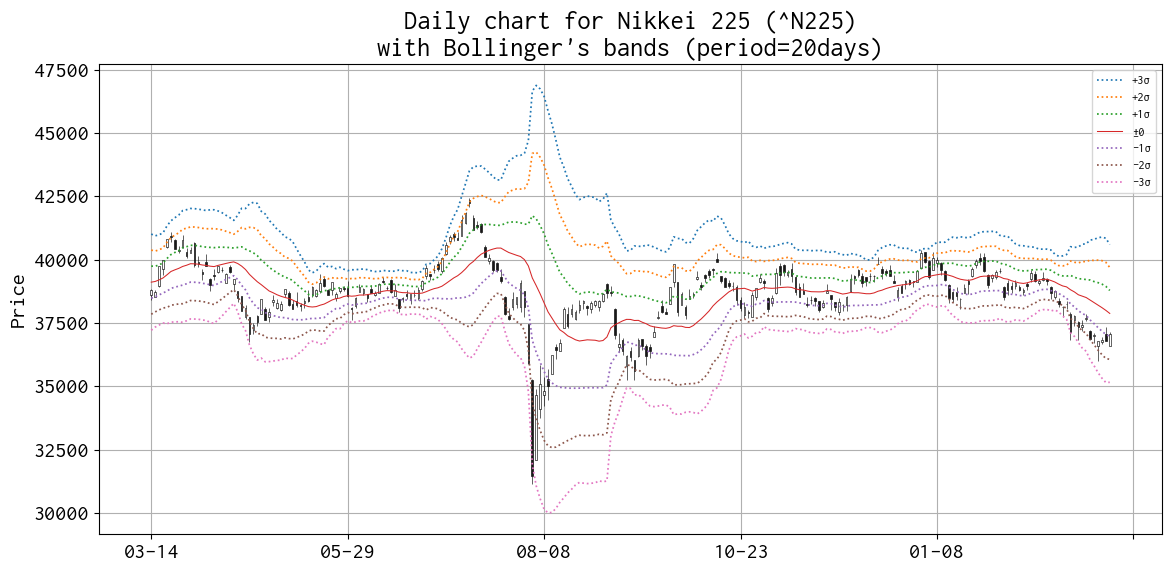

In [19]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['font.size'] = 16

fig, ax = plt.subplots(figsize=(12, 6))

# Bollinger bands
period = 20
r = df0['Close'].rolling(period)    
band_upper3 = r.mean() + 3 * r.std()
band_upper2 = r.mean() + 2 * r.std()
band_upper1 = r.mean() + 1 * r.std()
band_mean = r.mean()
band_lower1 = r.mean() - 1 * r.std()
band_lower2 = r.mean() - 2 * r.std()
band_lower3 = r.mean() - 3 * r.std()

apds  = [
    mpf.make_addplot(band_upper3[df.index], width=1.25, color='C0', linestyle='dotted', label='+3σ', ax=ax),
    mpf.make_addplot(band_upper2[df.index], width=1.25, color='C1', linestyle='dotted', label='+2σ', ax=ax),
    mpf.make_addplot(band_upper1[df.index], width=1.25, color='C2', linestyle='dotted', label='+1σ', ax=ax),
    mpf.make_addplot(band_mean[df.index], width=0.75, color='C3', label='±0', ax=ax),
    mpf.make_addplot(band_lower1[df.index], width=1.25, color='C4', linestyle='dotted', label='-1σ', ax=ax),
    mpf.make_addplot(band_lower2[df.index], width=1.25, color='C5', linestyle='dotted', label='-2σ', ax=ax),
    mpf.make_addplot(band_lower3[df.index], width=1.25, color='C6', linestyle='dotted', label='-3σ', ax=ax),
]   

mpf.plot(
    df,
    type='candle',
    style='default',
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

ax.grid()
ax.legend(loc='best', fontsize=9)

try:
    ax.set_title('Daily chart for %s (%s)\nwith Bollinger\'s bands (period=20days)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nwith Bollinger\'s bands (period=20days)' % symbol)

plt.tight_layout()
plt.savefig('daily_chart_bollinger_%s.png' % code)
plt.show()

In [4]:
len(df)

245

In [5]:
df.tail(2)['Close']

Date
2025-03-13 00:00:00+09:00    36790.031250
2025-03-14 00:00:00+09:00    37053.101562
Name: Close, dtype: float64

In [6]:
df.tail(2)['Close'].diff()

Date
2025-03-13 00:00:00+09:00           NaN
2025-03-14 00:00:00+09:00    263.070312
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean().tail()

Date
2025-03-10 00:00:00+09:00    38438.523125
2025-03-11 00:00:00+09:00    38327.347969
2025-03-12 00:00:00+09:00    38259.307969
2025-03-13 00:00:00+09:00    38178.974375
2025-03-14 00:00:00+09:00    38107.839219
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(75).mean().tail()

Date
2025-03-10 00:00:00+09:00    38868.577917
2025-03-11 00:00:00+09:00    38843.913906
2025-03-12 00:00:00+09:00    38825.223750
2025-03-13 00:00:00+09:00    38803.565104
2025-03-14 00:00:00+09:00    38786.241927
Name: Close, dtype: float64

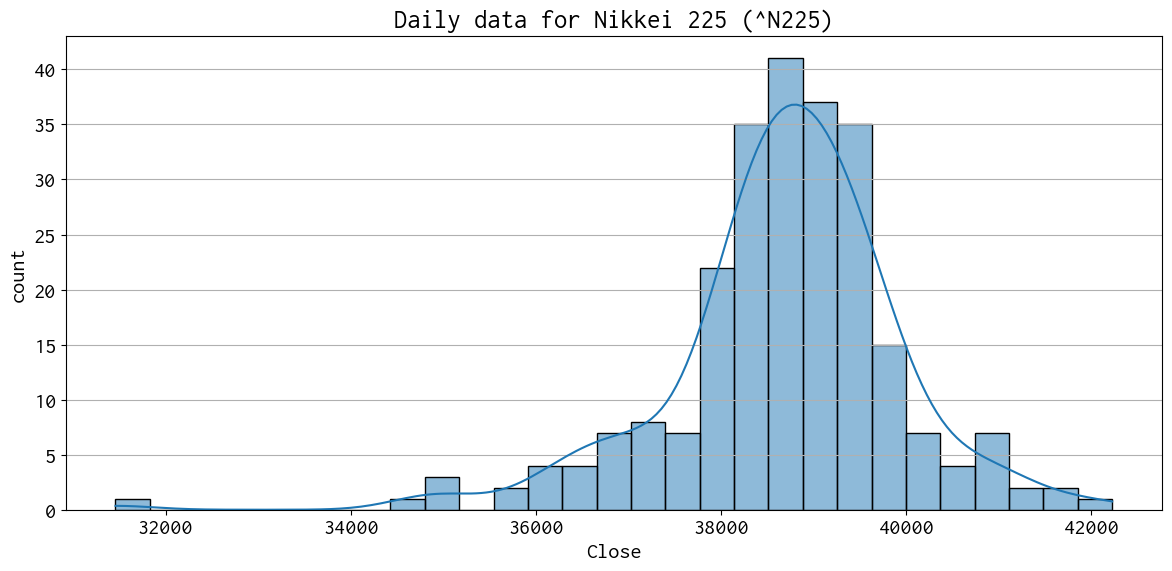

In [9]:
plt.rcParams['font.size'] = 16
fig = plt.figure(figsize=(12, 6))
#ax = fig.add_axes(111)
ax = fig.add_subplot(111)

sns.histplot(
    df['Close'],
    kde=True,
    ax=ax
)

ax.set_xlabel("Close")
ax.set_ylabel("count")
ax.set_title('Daily data for %s (%s)' % (ticker.info['longName'], symbol))
ax.grid(axis = 'y')

plt.tight_layout()
plt.savefig('daily_histogram_%s.png' % code)
plt.show()

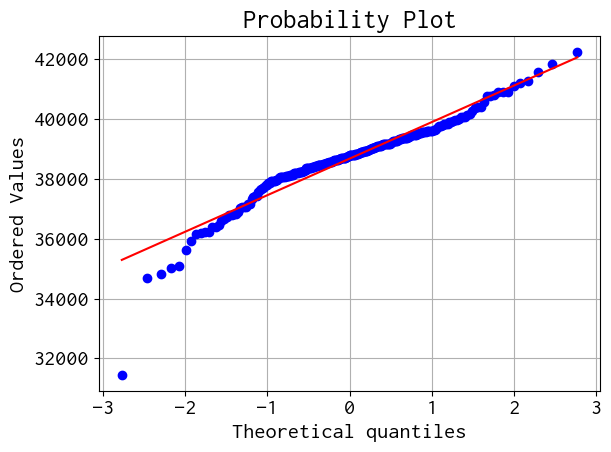

In [10]:
# Q-Qプロットの描画
stats.probplot(df['Close'], dist="norm", plot=plt)
plt.grid()

plt.tight_layout()
plt.savefig('daily_qqplot_%s.png' % code)
plt.show()

In [11]:
len(df)

245

In [12]:
stat, pval = stats.shapiro(df['Close'])
print('Shapiro-Wilk test statistic: %.3f, p-value: %.3f' % (stat, pval))

Shapiro-Wilk test statistic: 0.929, p-value: 0.000


In [13]:
res = stats.anderson(df['Close'])

In [14]:
print('%.3f' % res.statistic)

4.095


In [15]:
print(res.critical_values)

[0.567 0.646 0.775 0.904 1.075]


In [16]:
print(res.significance_level)

[15.  10.   5.   2.5  1. ]
